In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
ball_data=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
match_data=pd.read_csv('IPL Matches 2008-2020.csv')

In [4]:
match_data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,28-09-2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,05-11-2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,06-11-2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,08-11-2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [5]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
match_data.shape

(816, 17)

In [8]:
ball_data.shape

(193468, 18)

In [9]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [11]:
print('matches played so far :', match_data.shape[0])
print('\ncities in which matches have been played:\n',match_data['city'].unique())

matches played so far : 816

cities in which matches have been played:
 ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


In [12]:
print('teams participated:',match_data['team1'].unique())

teams participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [13]:
match_data['season']=pd.DatetimeIndex(match_data['date']).year

In [14]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [15]:
matches_played_per_season=match_data.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})

In [16]:
matches_played_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


<AxesSubplot:xlabel='season', ylabel='matches'>

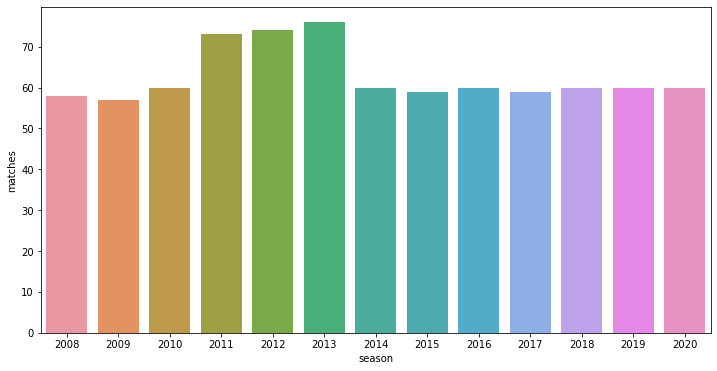

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='season',y='matches',data=matches_played_per_season)

In [18]:
season_data=match_data[['id','season']].merge(ball_data,left_on='id',right_on='id',how='left').drop('id',axis=1)

In [19]:
season_data

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [20]:
season_run=season_data.groupby(['season'])['total_runs'].sum().reset_index()

In [21]:
season_run

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


In [22]:
plt.figure(figsize=(12,6))
p=season_run.set_index('season')

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='season'>

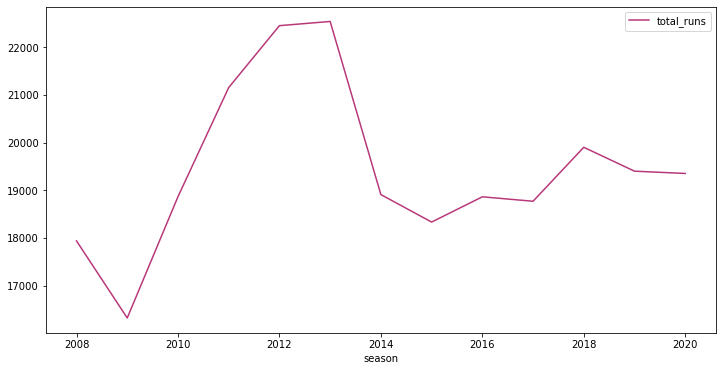

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data=p,palette='magma')

In [24]:
runs_per_season=pd.concat([matches_played_per_season,season_run.iloc[:,1]],axis=1)
runs_per_season['runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('season',inplace=True)
runs_per_season

,matches,total_runs,runs scored per match
season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


<AxesSubplot:title={'center':'no of tosses won by each team'}, xlabel='toss_winner'>

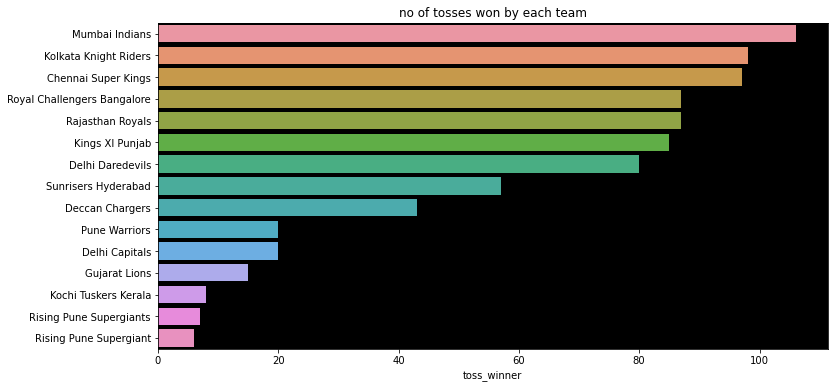

In [25]:
plt.figure(figsize=(12,6))
toss=match_data['toss_winner'].value_counts()
ax=plt.axes()
ax.set(facecolor='black')
ax.set_title('no of tosses won by each team')
sns.barplot(x=toss,y=toss.index)

<AxesSubplot:xlabel='season', ylabel='count'>

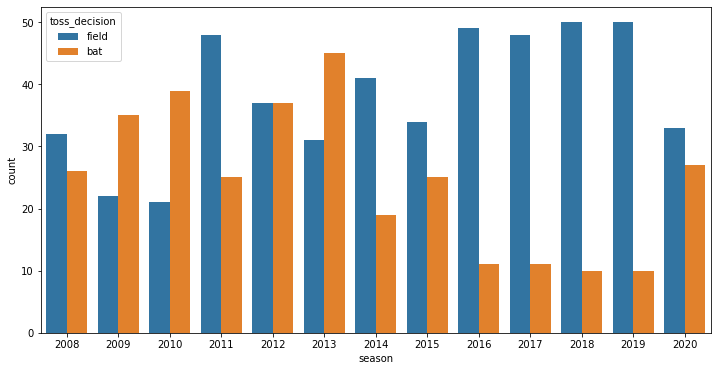

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=match_data)

In [27]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [28]:
match_data.venue[match_data.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [29]:
match_data.venue[match_data.result!='wickets'].mode()

0    Feroz Shah Kotla
dtype: object

In [30]:
match_data.venue[match_data.toss_winner=='Kings XI Punjab'][match_data.winner=='Kings XI Punjab'].mode()

0    Punjab Cricket Association Stadium, Mohali
dtype: object

In [31]:
match_data.winner[match_data.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [32]:
match_data.winner[match_data.result!='wickets'].mode()

0    Mumbai Indians
dtype: object

In [33]:
toss=match_data['toss_winner']==match_data['winner']
toss

0      False
1       True
2      False
3      False
4      False
       ...  
811    False
812    False
813     True
814     True
815    False
Length: 816, dtype: bool

<AxesSubplot:ylabel='count'>

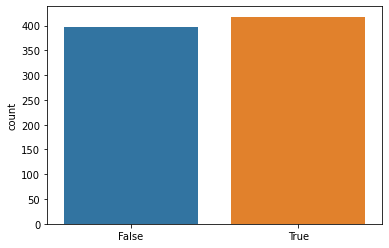

In [34]:
sns.countplot(x=toss)

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

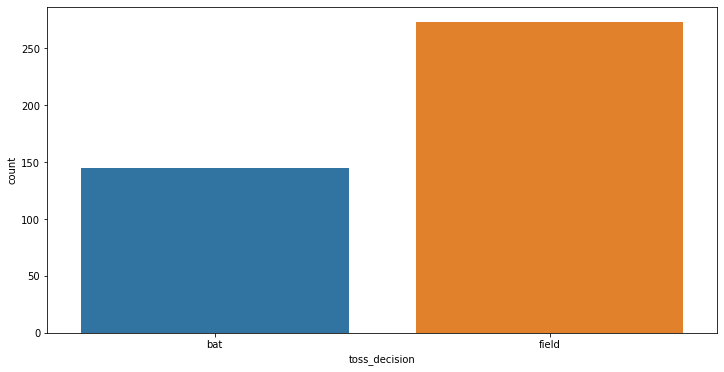

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x=match_data.toss_decision[match_data.winner==match_data.toss_winner])

In [61]:
player=(ball_data['batsman']=='V Kohli')

In [62]:
df_kohli=ball_data[player]

<AxesSubplot:ylabel='dismissal_kind'>

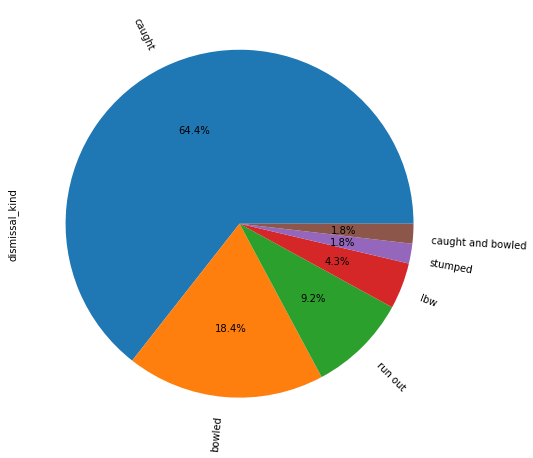

In [69]:
plt.figure(figsize=(12,8))
df_kohli.dismissal_kind.value_counts().plot.pie(autopct='%1.1f%%',rotatelabels=True)

In [70]:
def count(df_kohli,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

In [74]:
print("runs scored by 1's:",count(df_kohli,1))
print("runs scored by 2's:",count(df_kohli,2))
print("runs scored by 3's:",count(df_kohli,3))
print("runs scored by 4's:",count(df_kohli,4))
print("runs scored by 6's:",count(df_kohli,6))

runs scored by 1's: 1919
runs scored by 2's: 692
runs scored by 3's: 39
runs scored by 4's: 2016
runs scored by 6's: 1212


In [75]:
match_data[match_data['result_margin']==match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [108]:
runs=ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['batsman','runs']
x=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)


,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
532,YV Takawale,192
533,Yashpal Singh,47
534,Younis Khan,3
535,Yuvraj Singh,2750


<AxesSubplot:xlabel='batsman', ylabel='runs'>

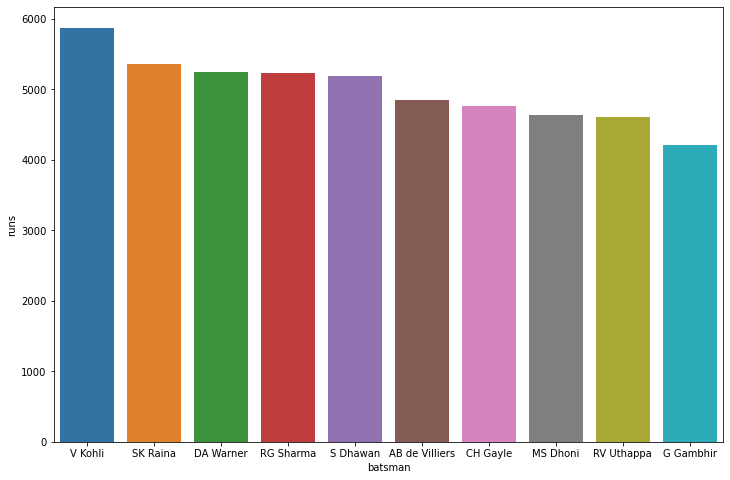

In [93]:
plt.figure(figsize=(12,8))
sns.barplot(x='batsman',y='runs' ,data=x)

<AxesSubplot:>

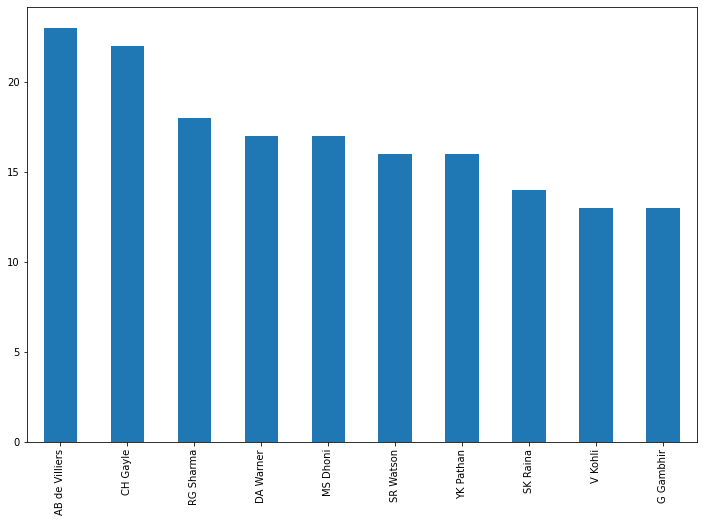

In [113]:
plt.figure(figsize=(12,8))
man_of_the_match_award=match_data.player_of_match.value_counts()[:10]
man_of_the_match_award.plot(kind='bar')